In [31]:
import pandas as pd

In [32]:
df=pd.read_csv('WHO-COVID-19-global-data.csv')
df

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
0,2020-01-05,AF,Afghanistan,EMRO,0,0,0,0
1,2020-01-12,AF,Afghanistan,EMRO,0,0,0,0
2,2020-01-19,AF,Afghanistan,EMRO,0,0,0,0
3,2020-01-26,AF,Afghanistan,EMRO,0,0,0,0
4,2020-02-02,AF,Afghanistan,EMRO,0,0,0,0
...,...,...,...,...,...,...,...,...
50395,2023-12-10,ZW,Zimbabwe,AFRO,0,265975,0,5730
50396,2023-12-17,ZW,Zimbabwe,AFRO,50,266025,0,5730
50397,2023-12-24,ZW,Zimbabwe,AFRO,23,266048,1,5731
50398,2023-12-31,ZW,Zimbabwe,AFRO,23,266071,0,5731


In [33]:
# The column Country_code seems unnecessary in this use case because the column Country can be used in its place:
df=df.drop('Country_code',axis=1)

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50400 entries, 0 to 50399
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Date_reported      50400 non-null  object
 1   Country            49140 non-null  object
 2   WHO_region         45360 non-null  object
 3   New_cases          50400 non-null  int64 
 4   Cumulative_cases   50400 non-null  int64 
 5   New_deaths         50400 non-null  int64 
 6   Cumulative_deaths  50400 non-null  int64 
dtypes: int64(4), object(3)
memory usage: 2.7+ MB


In [35]:
# The columns Country and WHO_region have less rows than other columns. Some data is missing.

In [36]:
# The column Date_reported is currently stored as object data. Let's change it to a better format:
df.Date_reported=pd.to_datetime(df.Date_reported)

In [37]:
# Let's view all country names in the data:
df.Country.unique()

array(['Afghanistan', 'Albania', 'Algeria', 'American Samoa', 'Andorra',
       'Angola', 'Anguilla', 'Antigua and Barbuda', 'Argentina',
       'Armenia', 'Aruba', 'Australia', 'Austria', 'Azerbaijan',
       'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus',
       'Belgium', 'Belize', 'Benin', 'Bermuda', 'Bhutan',
       'Bolivia (Plurinational State of)',
       'Bonaire, Saint Eustatius and Saba', 'Bosnia and Herzegovina',
       'Botswana', 'Brazil', 'British Virgin Islands',
       'Brunei Darussalam', 'Bulgaria', 'Burkina Faso', 'Burundi',
       'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada', 'Cayman Islands',
       'Central African Republic', 'Chad', nan, 'Chile', 'China',
       'Colombia', 'Comoros', 'Congo', 'Cook Islands', 'Costa Rica',
       "Côte d'Ivoire", 'Croatia', 'Cuba', 'Curaçao', 'Cyprus', 'Czechia',
       "Democratic People's Republic of Korea",
       'Democratic Republic of the Congo', 'Denmark', 'Djibouti',
       'Dominica', 'Dominican Republic', 

In [38]:
# Because official country names have been used, some names can be shortened for readability.
df['Country'].replace({'Bolivia (Plurinational State of)': 'Bolivia',
                       'Brunei Darussalam': 'Brunei',
                       'Democratic People\'s Republic of Korea': 'North Korea',
                       'Democratic Republic of the Congo': 'DR Congo',
                       'Falkland Islands (Malvinas)': 'Falkland Islands',
                       'Iran (Islamic Republic of)': 'Iran',
                       'Kosovo (in accordance with UN Security Council resolution 1244 (1999))': 'Kosovo',
                       'Lao People\'s Democratic Republic': 'Laos',
                       'Micronesia (Federated States of)': 'Micronesia',
                       'Netherlands (Kingdom of the)': 'Netherlands',
                       'occupied Palestinian territory, including east Jerusalem': 'Palestine',
                       'Republic of Korea': 'South Korea',
                       'Republic of Moldova': 'Moldova',
                       'Russian Federation': 'Russia',
                       'Syrian Arab Republic': 'Syria',
                       'Türkiye': 'Turkey',
                       'United Kingdom of Great Britain and Northern Ireland': 'UK',
                       'United Republic of Tanzania': 'Tanzania',
                       'United States of America': 'USA',
                       'United States Virgin Islands': 'U.S. Virgin Islands',
                       'Venezuela (Bolivarian Republic of)': 'Venezuela'
                      },
                       inplace=True)

In [39]:
# Let's find the largest amount of cumulative cases for each country:
cumulative=df.groupby('Country')['Cumulative_cases'].max().sort_values(ascending=False).reset_index()

In [40]:
# Ten countries with the highest amount of cumulative cases:
cumulative.head(10)

,Country,Cumulative_cases
0,USA,103436829
1,China,99323756
2,India,45013908
3,France,38997490
4,Germany,38437756
5,Brazil,37519960
6,South Korea,34571873
7,Japan,33803572
8,Italy,26621847
9,UK,24863166


In [41]:
# Countries with the least cumulative cases:
cumulative.tail()

,Country,Cumulative_cases
229,Tokelau,80
230,Holy See,26
231,Pitcairn,4
232,Turkmenistan,0
233,North Korea,0


In [42]:
# The zeros could be a result of reporting errors or unwillingness to cooperate with organizations.
# Let's view the countries with least cases that have reported at least some cases:
cumulative[cumulative.Cumulative_cases>0].tail()

,Country,Cumulative_cases
227,Montserrat,1403
228,Niue,993
229,Tokelau,80
230,Holy See,26
231,Pitcairn,4


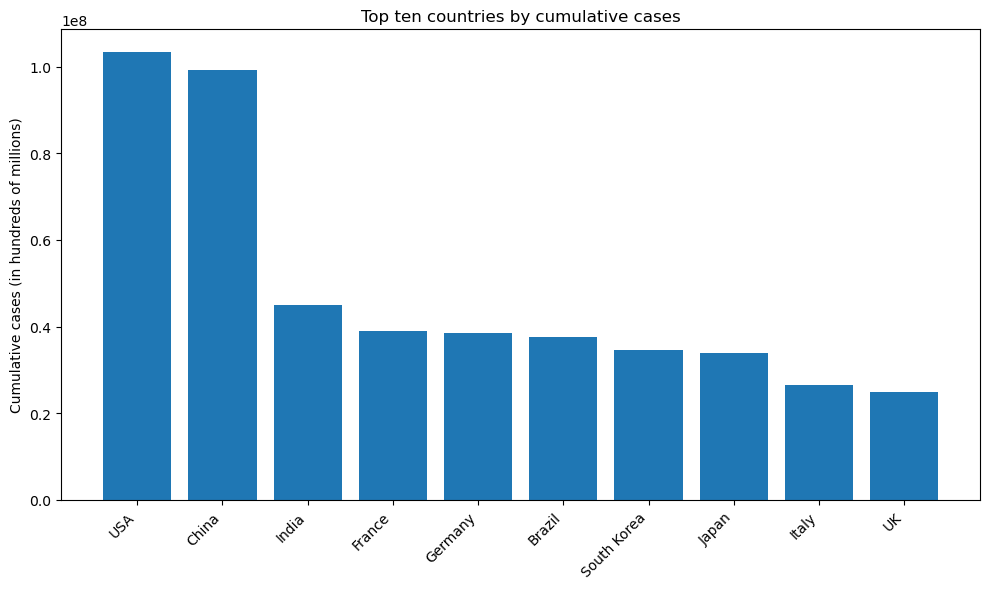

In [43]:
# Let's plot the countries with most cumulative cases:
import matplotlib.pyplot as plt
cumulative_topten=cumulative.head(10)

plt.figure(figsize=(10,6))
plt.bar(cumulative_topten['Country'], cumulative_topten['Cumulative_cases'])
plt.xlabel(None)
plt.ylabel('Cumulative cases (in hundreds of millions)')
plt.title('Top ten countries by cumulative cases')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

In [44]:
# Next, we'll do the same with cumulative deaths:
deaths=df.groupby('Country')['Cumulative_deaths'].max().sort_values(ascending=False).reset_index()

In [45]:
deaths.head()

,Country,Cumulative_deaths
0,USA,1161235
1,Brazil,702116
2,India,533364
3,Russia,401153
4,Mexico,334958


In [46]:
# With only the top five countries showing, it can already be seen that some countries have relatively more deaths.

In [47]:
deaths.tail()

,Country,Cumulative_deaths
229,Saint Helena,0
230,Turkmenistan,0
231,North Korea,0
232,Holy See,0
233,Tokelau,0


In [48]:
# Because the countries above have had very little cases overall, it is possible that there are no Covid deaths.
# For the sake of curiousity, let's view the countries that have had at least some deaths:
deaths[deaths.Cumulative_deaths>0].tail()

,Country,Cumulative_deaths
221,Saint Barthélemy,5
222,Saint Pierre and Miquelon,2
223,Cook Islands,2
224,Nauru,1
225,Tuvalu,1


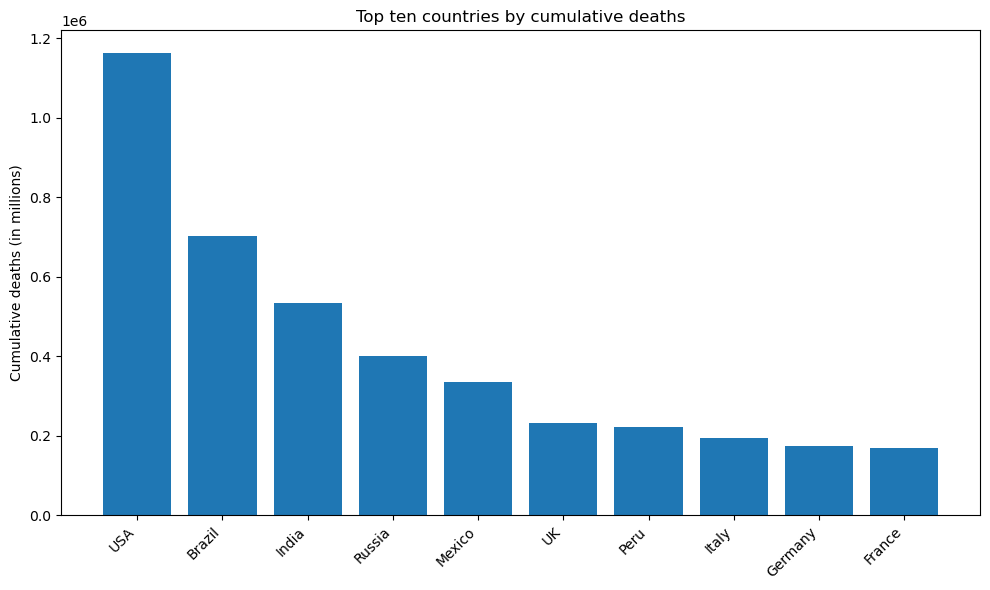

In [49]:
# Let's plot the top ten countries again:
import matplotlib.pyplot as plt
deaths_topten=deaths.head(10)

plt.figure(figsize=(10,6))
plt.bar(deaths_topten['Country'], deaths_topten['Cumulative_deaths'])
plt.xlabel(None)
plt.ylabel('Cumulative deaths (in millions)')
plt.title('Top ten countries by cumulative deaths')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

In [50]:
# There are notable differences in the top ten countries by cases and the top ten countries by deaths.
# For example, China is very close to the USA in cumulative cases, but it is not even listed in the top ten countries by deaths.
# Data collection and reporting methods may vary, and this does not directly imply that this is a result of medical solutions etc.

In [51]:
# Let's create a death percentage column that shows how many deaths have been reported compared to reported cases:
df['Death_percentage']=df.Cumulative_deaths/df.Cumulative_cases*100

In [52]:
# In order to be as accurate as possible, death percentages should be counted based on the latest reports.
# Not every country has last reported on the same date, which means that the date cannot be manually chosen.
df_latest=df.sort_values(by='Date_reported', ascending=False)
df_latest=df_latest.drop_duplicates(subset='Country', keep='first')

In [53]:
# Now the dataframe df_latest contains only the latest data for each country.

In [54]:
df_latest=df_latest.sort_values(by='Death_percentage',ascending=False)
df_latest.head()

,Date_reported,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths,Death_percentage
49979,2024-01-07,Yemen,EMRO,0,11945,0,2159,18.074508
43679,2024-01-07,Sudan,EMRO,0,63993,0,5046,7.885237
44519,2024-01-07,Syria,EMRO,0,57423,0,3163,5.508246
42629,2024-01-07,Somalia,EMRO,0,27334,0,1361,4.979147
35699,2024-01-07,Peru,AMRO,0,4536733,0,221583,4.884198


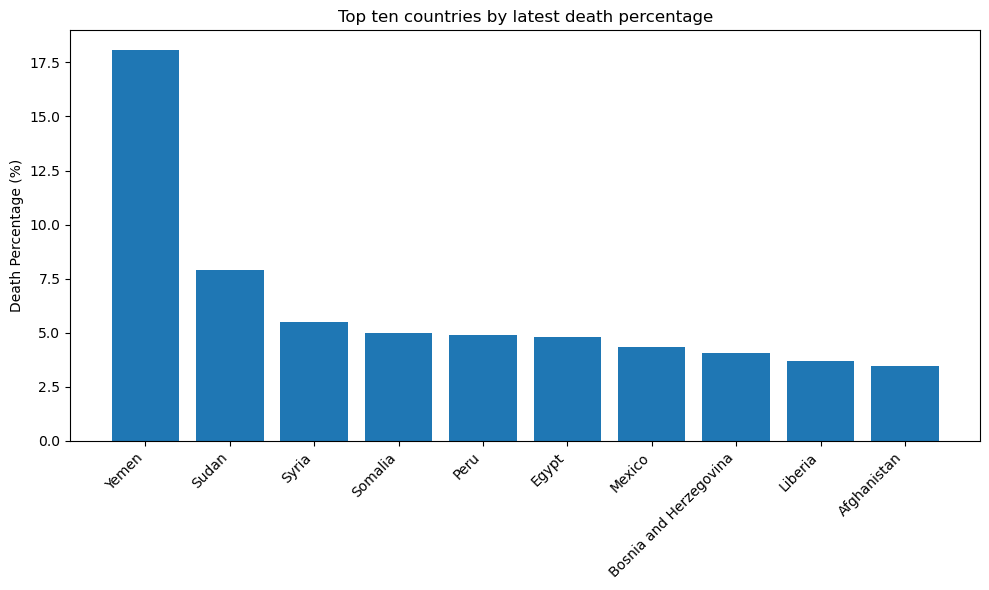

In [55]:
# Let's plot the top ten countries by death percentage:

latest_topten=df_latest.head(10)
plt.figure(figsize=(10, 6))
plt.bar(latest_topten['Country'], latest_topten['Death_percentage'])
plt.xlabel(None)
plt.ylabel('Death Percentage (%)')
plt.title('Top ten countries by latest death percentage')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

In [56]:
# Perhaps the most obvious takeaway in this graph is that "uncertain" countries have more deaths per case.